Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Importing Dataset

In [2]:
dataset = pd.read_csv('KNN_Project_Data')

In [3]:
dataset.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
x = dataset.drop('TARGET CLASS', axis = 1)
y = dataset['TARGET CLASS']

Splitting dataset into Train/Test set

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Feature Scaling dataset

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training dataset with K Nearest Neighbors model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Predictions

In [8]:
y_pred = classifier.predict(x_test)

In [9]:
results = pd.DataFrame({'Test set': np.array(y_test), 'Predictions': np.array(y_pred)})

In [10]:
results

,Test set,Predictions
0,1,0
1,1,1
2,0,0
3,0,1
4,1,1
...,...,...
195,0,1
196,1,1
197,1,1
198,1,0


Metrics

In [11]:
print(confusion_matrix(y_test, y_pred))

[[73 20]
 [25 82]]


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        93
           1       0.80      0.77      0.78       107

    accuracy                           0.78       200
   macro avg       0.77      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200



Finding optimal number of K by using Elbow Method

In [13]:
error_rate = []
for i in range(1, 40):
  classifier_i = KNeighborsClassifier(n_neighbors= i, metric= 'minkowski', p = 2)
  classifier_i.fit(x_train, y_train)
  y_pred_i = classifier_i.predict(x_test)
  error_rate.append(np.mean(y_pred_i != y_test))

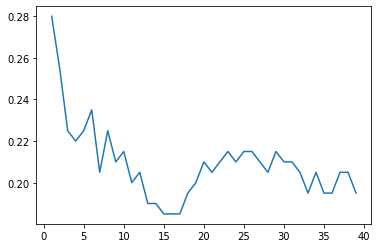

In [14]:
plt.plot(range(1, 40), error_rate)

K = 15 (from Elbow Method)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
print(confusion_matrix(y_test, y_pred))

[[77 16]
 [21 86]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        93
           1       0.84      0.80      0.82       107

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

